Problem statement

Predict if the Merchant is Fraudster or not for an e-commerce client

‘XYZ’ is a large e-commerce company with its operations in several countries. As the online giant grows, so has
the number of fraudster merchants are. They deliver counterfeits or, in some cases, nothing at all. Such
schemes leave customers duped, and place both legitimate merchants and the company itself in a constant
battle to rid the marketplace of scammers. Determining this is also important in budgeting for fraud
investigation. It's a well-known problem both to the company and to merchants, which they say hasn't
effectively addressed the issue. They are serious about it and want to protect themselves from these fraudulent
merchants using technology.

You are expected to create an analytical and modelling framework to predict the Merchant Fraudulency(yes/no)
based on the quantitative and qualitative features provided in the dataset while answering other questions too
cited below.


MOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


IMPORTING LIBRARIES

In [ ]:
import os
import numpy as np #for mathematical
import pandas as pd
# 1. Preprocessing Libraries
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder    #Dummification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    #NEW!
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold    #Hyperparameter tuning, StratifiedKFold
# another way to cross-validate
from sklearn.compose import ColumnTransformer
# 2. Algorithm Import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier


# 3. Evaluation Library
from sklearn.metrics import confusion_matrix

# 4. Viz Lib
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Misc Lib
# !pip install imblearn
from imblearn.over_sampling import SMOTE    #Data/Class imbalance
import random
random.seed(123)
import warnings
warnings.filterwarnings('ignore')

LOADING THE TRAIN DATA & TEST DATA

In [ ]:
train_merchant = pd.read_csv("/content/drive/MyDrive/mith/train_merchant_data-1561627820784.csv")
train_order = pd.read_csv("/content/drive/MyDrive/mith/train_order_data-1561627847149.csv")
train_data = pd.read_csv("/content/drive/MyDrive/mith/train-1561627878332.csv")


test_merchant = pd.read_csv("/content/drive/MyDrive/mith/test_merchant_data-1561627903902.csv")
test_order = pd.read_csv("/content/drive/MyDrive/mith/test_order_data-1561627931868.csv")


UNDERSTANDING THE DATASET

In [ ]:
print(train_merchant.head(), "\n")
#to know the top five records of test_merchant dataset

print(train_merchant.columns, "\n")
#it displays the names of all colums in given dataset

print(train_merchant.dtypes, "\n")
#it displays datatype of each attribute

print(train_merchant.describe(), "\n")
#it gives the statistical information of the data like : mean,median,Q1,Q3,minimum and maximum value

print(train_merchant.describe(include='object'), "\n")

print(train_merchant.shape), "\n"
#to know the number of rows and columns in the dataset

print(train_merchant.isnull().sum(), "\n")
#to know weather there are any null values or empty cells

   Ecommerce_Provider_ID  Merchant_ID Merchant_Registration_Date  \
0                1746213        50448        2018-05-01 21:15:11   
1                1746213       338754        2018-04-14 10:13:00   
2                1746213       291127        2018-06-20 07:44:22   
3                1746213       319919        2018-06-27 01:41:39   
4                1746213       195911        2018-01-05 00:55:41   

  Registered_Device_ID Gender  Age      IP_Address  
0        VATQMMZTVOZUT      F   39   48.151.136.76  
1        LJCILLBRQZNKS      M   35    94.9.145.169  
2        JFVHSUGKDAYZV      F   40   58.94.157.121  
3        WFRXMPLQYXRMY      M   37  193.187.41.186  
4        GGHKWMSWHCMID      F   27   125.96.20.172   

Index(['Ecommerce_Provider_ID', 'Merchant_ID', 'Merchant_Registration_Date',
       'Registered_Device_ID', 'Gender', 'Age', 'IP_Address'],
      dtype='object') 

Ecommerce_Provider_ID          int64
Merchant_ID                    int64
Merchant_Registration_Date    obj

In [ ]:
train_merchant.drop(["Ecommerce_Provider_ID"], axis = 1, inplace = True)

##'Ecommerce_Provider_ID' will be dropped due to No Information Gain.

In [ ]:
train_merchant.dtypes

Merchant_ID                    int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
dtype: object

In [ ]:
print(train_order.head(), "\n")
print(train_order.columns, "\n")
print(train_order.dtypes, "\n")
print(train_order.describe(), "\n")
print(train_order.describe(include='object'), "\n")
print(train_order.shape), "\n"
print(train_order.isnull().sum(), "\n")

   Customer_ID      Order_ID        Date_of_Order  Order_Value_USD  \
0       126221  37cea9512f8d  2018-04-29 16:39:26              148   
1       115471  09f12e6efde2  2018-06-16 17:05:40              145   
2       151786  4e69e956e159  2018-10-26 18:00:46               62   
3       140456  663443aaeb82  2018-12-12 05:41:52               28   
4       114721  99258810c121  2018-09-20 11:06:10               70   

  Order_Source Order_Payment_Method  Merchant_ID  
0       Direct          Credit Card       124231  
1          SEO          Credit Card       136178  
2          Ads     Internet Banking       198611  
3          SEO           Debit Card       127993  
4          Ads          Credit Card       250146   

Index(['Customer_ID', 'Order_ID', 'Date_of_Order', 'Order_Value_USD',
       'Order_Source', 'Order_Payment_Method', 'Merchant_ID'],
      dtype='object') 

Customer_ID              int64
Order_ID                object
Date_of_Order           object
Order_Value_USD      

In [ ]:
print(test_merchant.head(), "\n")
print(test_merchant.columns, "\n")
print(test_merchant.dtypes, "\n")
print(test_merchant.describe(), "\n")
print(test_merchant.describe(include='object'), "\n")
print(test_merchant.shape), "\n"
print(test_merchant.isnull().sum(), "\n")

   Ecommerce_Provider_ID  Merchant_ID Merchant_Registration_Date  \
0                1746213        53637        2018-02-11 20:50:29   
1                1746213       243517        2018-04-06 13:19:39   
2                1746213       343640        2018-01-12 16:47:49   
3                1746213        69889        2018-02-19 21:58:52   
4                1746213       125706        2018-05-17 15:50:19   

  Registered_Device_ID Gender  Age      IP_Address  
0        PTMLBENYMQCTV      F   40  134.162.124.62  
1        HMCLDZUZPWZRR      M   39    152.76.98.87  
2        VLGSMAPXISSEJ      M   23    31.202.3.255  
3        ZINHISBBOKQXT      M   34  12.242.168.185  
4        WFKEAOTPHTYEO      M   20    26.61.210.47   

Index(['Ecommerce_Provider_ID', 'Merchant_ID', 'Merchant_Registration_Date',
       'Registered_Device_ID', 'Gender', 'Age', 'IP_Address'],
      dtype='object') 

Ecommerce_Provider_ID          int64
Merchant_ID                    int64
Merchant_Registration_Date    obj

In [ ]:
test_merchant.drop(["Ecommerce_Provider_ID"], axis = 1, inplace = True)

In [ ]:
test_merchant.dtypes

Merchant_ID                    int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
dtype: object

In [ ]:
print(test_order.head(), "\n")
print(test_order.columns, "\n")
print(test_order.dtypes, "\n")
print(test_order.describe(), "\n")
print(test_order.describe(include='object'), "\n")
print(test_order.shape), "\n"
print(test_order.isnull().sum(), "\n")

   Customer_ID      Order_ID        Date_of_Order  Order_Value_USD  \
0       157068  a032de091f51  2018-03-09 09:09:42               60   
1       112534  0d563f0606d6  2018-06-13 20:11:19               28   
2       148774  18fb0fa888b6  2018-04-14 04:19:36               75   
3       114528  ed1eb920d721  2018-04-01 13:55:44               98   
4       120940  313dcf962627  2018-05-25 02:08:18               35   

  Order_Source Order_Payment_Method  Merchant_ID  
0          SEO          Credit Card        53637  
1          SEO          Credit Card       243517  
2          Ads           Debit Card       343640  
3          SEO          Credit Card        69889  
4          SEO          Credit Card       125706   

Index(['Customer_ID', 'Order_ID', 'Date_of_Order', 'Order_Value_USD',
       'Order_Source', 'Order_Payment_Method', 'Merchant_ID'],
      dtype='object') 

Customer_ID              int64
Order_ID                object
Date_of_Order           object
Order_Value_USD      

MERGING THE TRAIN DATA & TEST DATA

In [ ]:
train4=pd.merge(train_merchant,train_order)
train4

#merge command is used to join two datasets , as merchand_id is common attribute in both datasets we mergedon merchant_id

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card
1,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking
2,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card
3,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet
4,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet
...,...,...,...,...,...,...,...,...,...,...,...,...
54208,222372,2018-05-01 21:58:19,KGVMENGCIAVOK,M,43,247.25.244.31,111700,58d25819870c,2018-06-12 17:18:37,108,Ads,E-wallet
54209,73491,2018-06-11 19:54:13,QJGPOYDONTYCN,M,41,80.30.170.122,122148,569444812870,2018-09-17 08:49:53,130,Ads,Debit Card
54210,176456,2018-01-06 20:05:55,ZOJNAJMGNRQPZ,F,36,188.39.154.217,125450,902290f02e47,2018-04-10 04:20:07,42,Direct,Debit Card
54211,228277,2018-03-09 07:08:10,MQAOMNZFAHZLS,M,18,116.20.101.178,115567,f465038328e7,2018-06-21 03:35:43,82,Ads,Debit Card


In [ ]:
train_N = pd.merge(train4,train_data,on='Merchant_ID')

In [ ]:
train_N.head()

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
0,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0
1,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0
2,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0
3,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0
4,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0


In [ ]:
test_data=pd.merge(test_merchant,test_order,on='Merchant_ID')

In [ ]:
test_data.head()

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card
1,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card
2,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card
3,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card
4,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card


In [ ]:
train_N.dtypes

Merchant_ID                    int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Fraudster                      int64
dtype: object

In [ ]:
test_data.dtypes

Merchant_ID                    int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
dtype: object

In [ ]:
train_N[['Merchant_ID', 'Customer_ID']] = train_N[['Merchant_ID', 'Customer_ID']].astype('object')
test_data[['Merchant_ID', 'Customer_ID']] = test_data[['Merchant_ID', 'Customer_ID']].astype('object')
print(train_N.dtypes, '\n')
print(test_data.dtypes)

##'Merchant_ID', 'Customer_ID' will be converted to dtype 'object'.

Merchant_ID                   object
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                   object
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Fraudster                      int64
dtype: object 

Merchant_ID                   object
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                   object
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
dtype: object


In [ ]:
train_N.describe(include='object')

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Source,Order_Payment_Method
count,54213,54213,54213,54213,54213,54213,54213,54213,54213,54213
unique,54213,54213,51291,2,52028,34081,54213,54161,3,5
top,50448,2018-05-01 21:15:11,RJEAMRBBMPWEA,M,91.161.239.48,154763,3b8983a83c7b,2018-08-01 01:24:54,SEO,Credit Card
freq,1,1,9,31761,9,7,1,2,21884,21844


In [ ]:
train_N['Fraudster'].value_counts()

0    49188
1     5025
Name: Fraudster, dtype: int64

In [ ]:
train_N['Fraudster'].value_counts(normalize = True)

0    0.90731
1    0.09269
Name: Fraudster, dtype: float64

In [ ]:
train_N.sample()

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
48076,271285,2018-05-13 17:52:15,TZBFBAKCRFUNT,F,44,128.100.33.185,122034,ab0fcda61ba0,2018-08-14 08:19:07,55,Direct,Credit Card,0


In [ ]:
test_data.sample()

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
7482,108350,2018-07-12 04:53:18,JBSPKHPNPGKDA,F,22,106.108.170.177,124552,de0b89f690ab,2018-09-05 07:59:43,128,Direct,Debit Card


Installing the package to get the IP address to match with the countries

In [ ]:
pip install maxminddb-geolite2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from geolite2 import geolite2

def get_continent(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['continent']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()
# IP's for testing: http://upd.emule-security.org/ipfilter.zip
#x = pd.read_csv(r'D:\download\ipfilter.zip',usecols=[0], sep='\s*\-\s*',header=None, names=['ip'])

# get unique IPs
unique_ips = train_N["IP_Address"].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
train_N['Continent'] = train_N['IP_Address'].map(unique_ips.apply(get_continent))

geolite2.close()

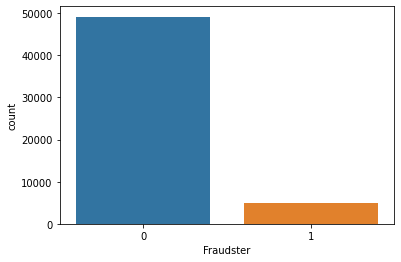

0    90.731005
1     9.268995
Name: Fraudster, dtype: float64

In [ ]:
train_N['Fraudster'].value_counts()
sns.countplot(x='Fraudster',data=train_N)
plt.show()
(train_N["Fraudster"].value_counts()/train_N.shape[0]*100)

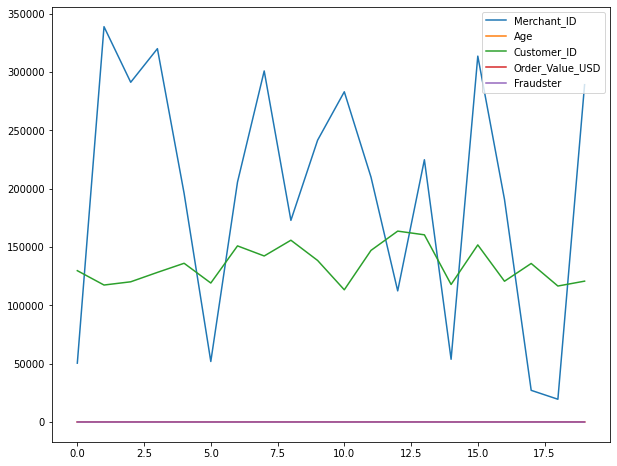

In [ ]:
# Line plot
train_N.head(20).plot(kind='line', figsize=(10,8))
plt.show()

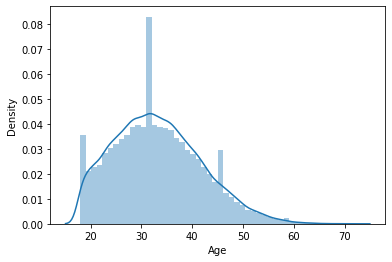

In [ ]:
# Check distribution of age
# Density Curve + Histogram, shows distribution of Continuous Feature
%matplotlib inline
sns.distplot(train_N["Age"]) #NT: y is percentage count

In [ ]:
train_N.sample(10)

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Continent
3142,22495,2018-04-07 07:27:05,DFDGEVALCBQQC,F,28,246.92.39.31,150596,8ffbda0f9d44,2018-07-22 18:44:44,48,Direct,E-wallet,0,NaN
38622,363122,2018-08-15 13:08:15,XHCOYWASCAJTR,F,28,153.68.135.77,158054,a46bf54708c2,2018-10-15 15:21:37,80,Ads,Debit Card,0,North America
5682,54362,2018-04-18 08:05:25,LVJXSCKUVFESH,M,23,24.228.185.125,136261,97b797be289a,2018-04-21 05:03:50,138,Direct,E-wallet,0,North America
7898,368897,2018-04-03 17:58:21,MINWCZOFDMFEX,M,29,24.141.142.229,131511,6c38b7f8203c,2018-06-23 11:51:32,50,Direct,E-wallet,0,North America
51087,253815,2018-06-30 08:59:06,FLCXSDJPRHKXZ,M,22,106.123.60.13,134811,7667661ba327,2018-08-28 10:11:38,48,Ads,E-wallet,0,Asia
45483,394216,2018-04-02 06:29:18,CDMAGFWDZXIRB,F,51,207.184.183.205,139710,3e6c9feb15a4,2018-07-31 14:51:34,122,Direct,Debit Card,0,North America
43483,151691,2018-01-30 04:32:34,UBMHKXNNGXQTS,F,37,203.64.169.112,115564,194568425397,2018-02-06 12:09:28,58,Direct,Credit Card,0,Asia
3630,268190,2018-02-14 06:48:45,HYXADCDTDGNYW,M,36,101.233.83.15,128760,5cc259886c56,2018-04-11 16:41:03,135,SEO,Debit Card,0,Asia
3361,212371,2018-08-15 22:11:16,OCQKSVPEACJMK,M,33,204.199.250.250,127408,604d6d1a8148,2018-09-18 11:03:46,125,SEO,E-wallet,0,North America
35529,337071,2018-05-07 13:30:55,GPQEXUXJJMGPJ,M,24,82.14.175.211,145206,7589749676c7,2018-08-19 06:16:59,118,SEO,Credit Card,0,Europe


In [ ]:
train_N['Continent'].isnull().sum()

7751

In [ ]:
from geolite2 import geolite2

def get_continent(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['continent']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()

# get unique IPs
unique_ips = test_data["IP_Address"].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
test_data['Continent'] = test_data['IP_Address'].map(unique_ips.apply(get_continent))

geolite2.close()

In [ ]:
train_N['Continent'].fillna('Unknown', inplace=True)

In [ ]:
train_N.sample(5)

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Continent
43149,282785,2018-05-14 01:52:23,WVUCEMMZMPCPB,F,37,248.168.142.79,160484,b76f1c08a090,2018-08-03 06:19:40,115,SEO,Debit Card,0,Unknown
46830,305458,2018-03-03 01:13:33,FVUCSMQFSVAAR,M,24,43.164.146.77,153384,25d2ecf76149,2018-03-13 09:25:11,112,SEO,Credit Card,1,Asia
21440,317107,2018-04-06 07:35:08,MGHMOKBZPVJGE,F,35,227.6.100.67,145079,b31da3b204b6,2018-04-20 03:34:23,105,Ads,E-wallet,0,Unknown
14341,33382,2018-07-10 03:17:28,BLDUQWOARBHLT,F,42,61.227.164.96,123601,4daf0b71f918,2018-07-21 06:01:12,102,Ads,Credit Card,0,Asia
16604,59210,2018-05-15 11:18:36,SMLJIZLYVAYGK,F,40,242.187.212.160,144281,0263a64928e2,2018-08-26 07:31:48,95,Ads,Internet Banking,0,Unknown


In [ ]:
train_N['Continent'].fillna('Unknown', inplace=True)

In [ ]:
test_data['Continent'].isnull().sum()

1967

In [ ]:
test_data['Continent'].fillna('Unknown', inplace=True)

In [ ]:
conti = pd.crosstab(train_N.Fraudster, train_N.Continent)

In [ ]:
conti

Continent,Africa,Asia,Europe,North America,Oceania,South America,Unknown
Fraudster,,,,,,,
0,585,10371,8637,20123,711,1661,7100
1,81,1062,849,2126,67,189,651


FEATURE ENGINEERING

Converting Date_of_order and Merchand_registration_date type as datetime64 for both train and test data

In [ ]:
train_N["Date_of_Order"] = train_N["Date_of_Order"].astype('datetime64[ns]')
train_N["Merchant_Registration_Date"] = train_N["Merchant_Registration_Date"].astype('datetime64[ns]')

In [ ]:
test_data["Date_of_Order"] = test_data["Date_of_Order"].astype('datetime64[ns]')
test_data["Merchant_Registration_Date"] = test_data["Merchant_Registration_Date"].astype('datetime64[ns]')

In [ ]:
train_N.head(5)

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Continent
0,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0,North America
1,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0,Europe
2,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0,Asia
3,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0,Europe
4,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0,Asia


In [ ]:
test_data.head(5)

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Continent
0,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,North America
1,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,Oceania
2,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,Europe
3,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,North America
4,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,North America


In [ ]:
##Creating a new_feature Difference_Date by substracting Date_of_order and Merchant_registration_date
train_N["Difference_Dates"]=(train_N["Date_of_Order"])- ( train_N["Merchant_Registration_Date"])
test_data["Difference_Dates"]=(test_data["Date_of_Order"])- ( test_data["Merchant_Registration_Date"])

In [ ]:
train_N.head()

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Continent,Difference_Dates
0,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0,North America,89 days 13:44:02
1,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0,Europe,62 days 01:06:47
2,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0,Asia,54 days 02:22:04
3,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0,Europe,25 days 14:05:12
4,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0,Asia,101 days 07:07:03


In [ ]:
test_data.head()

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Continent,Difference_Dates
0,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,North America,25 days 12:19:13
1,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,Oceania,68 days 06:51:40
2,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,Europe,91 days 11:31:47
3,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,North America,40 days 15:56:52
4,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,North America,7 days 10:17:59


In [ ]:
##Dividing Difference_dates by day we get the differnce
train_N["Difference_Dates"]=train_N["Difference_Dates"]/np.timedelta64(1, "D")
test_data["Difference_Dates"]=test_data["Difference_Dates"]/np.timedelta64(1, "D")

In [ ]:
train_N.head()

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Continent,Difference_Dates
0,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0,North America,89.572245
1,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0,Europe,62.046377
2,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0,Asia,54.098657
3,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0,Europe,25.586944
4,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0,Asia,101.296562


In [ ]:
test_data.head()

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Continent,Difference_Dates
0,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,North America,25.513345
1,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,Oceania,68.285880
2,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,Europe,91.480405
3,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,North America,40.664491
4,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,North America,7.429155


In [ ]:
train_N[train_N["Difference_Dates"]<=0].Fraudster.value_counts()

Series([], Name: Fraudster, dtype: int64)

In [ ]:
train_N.Fraudster.value_counts()

0    49188
1     5025
Name: Fraudster, dtype: int64

In [ ]:
train_dev_Id=train_N['Registered_Device_ID']
test_dev_id=test_data['Registered_Device_ID']

In [ ]:
train_dev_Id= pd.DataFrame(train_dev_Id)
test_dev_id=pd.DataFrame(test_dev_id)

In [ ]:
train_N['Registered_Device_Count'] = train_dev_Id.apply(lambda x: x.map(x.value_counts()))
test_data['Registered_Device_Count'] = test_dev_id.apply(lambda x: x.map(x.value_counts()))

In [ ]:
train_N.head(10)

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Continent,Difference_Dates,Registered_Device_Count
0,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0,North America,89.572245,1
1,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0,Europe,62.046377,1
2,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0,Asia,54.098657,1
3,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0,Europe,25.586944,1
4,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0,Asia,101.296562,1
5,51878,2018-07-29 05:40:41,YSUUQMHOIJZHJ,M,30,10.119.144.96,119105,942386c5ab2c,2018-10-11 09:41:51,75,Ads,Credit Card,0,Unknown,74.167477,1
6,205612,2018-02-03 05:37:07,VOQNWQHJUKFSZ,F,28,135.121.143.189,150927,f5135bb9ab13,2018-03-27 20:06:24,65,SEO,Credit Card,0,North America,52.603669,1
7,300823,2018-02-24 12:16:03,BQKBQIXSRMCHT,M,31,106.24.64.41,142294,d6f648eb802f,2018-04-12 02:19:59,152,SEO,Internet Banking,0,Asia,46.586065,1
8,172822,2018-01-22 12:29:32,MKGAJACYBWCXO,F,27,160.16.202.244,155784,0f98e4cfd92d,2018-02-02 16:39:03,80,SEO,Debit Card,1,Asia,11.173275,1
9,241476,2018-01-11 22:05:15,JJHGNMWRZRCML,M,41,93.33.235.39,138451,86ffa45527dc,2018-01-13 22:05:16,155,Ads,Credit Card,1,Europe,2.000012,3


In [ ]:
test_data.head(10)

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Continent,Difference_Dates,Registered_Device_Count
0,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,North America,25.513345,1
1,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,Oceania,68.285880,1
2,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,Europe,91.480405,1
3,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,North America,40.664491,1
4,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,North America,7.429155,1
5,99740,2018-01-14 22:38:00,QLABSSSYDDVLX,F,53,67.233.208.80,138132,403af6a56bf6,2018-03-12 17:49:02,45,Direct,E-wallet,North America,56.799329,1
6,286064,2018-01-12 01:04:37,YZUTNBIQUUKJG,M,28,88.120.173.167,126307,2000c9a7f224,2018-01-14 01:04:38,125,Ads,Internet Banking,Europe,2.000012,3
7,106848,2018-05-19 08:50:04,QNDARFHAOPKEU,M,33,119.4.77.135,156600,14cef8a72083,2018-07-10 21:31:50,65,Ads,Internet Banking,Asia,52.529005,1
8,312957,2018-07-28 09:06:07,WWYIKYOOFLPXA,F,29,86.93.77.38,157709,3bd27c578c4f,2018-08-18 02:37:37,228,SEO,Credit Card,Europe,20.730208,1
9,97205,2018-03-25 19:01:48,UHNFWFTDUJCUJ,M,50,67.83.248.123,116897,21e5e03d5346,2018-07-20 21:37:01,85,SEO,Credit Card,North America,117.107789,1


In [ ]:
##Binning into Four Levels
bins = [0,3,5,7,10]
labels = ["low","medium","high","very-high"]
train_N['Binned_Device_Count'] = pd.cut(train_N['Registered_Device_Count'], bins=bins, labels=labels)
test_data['Binned_Device_Count'] = pd.cut(test_data['Registered_Device_Count'], bins=bins, labels=labels)

In [ ]:
train_N.head()

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Continent,Difference_Dates,Registered_Device_Count,Binned_Device_Count
0,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0,North America,89.572245,1,low
1,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0,Europe,62.046377,1,low
2,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0,Asia,54.098657,1,low
3,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0,Europe,25.586944,1,low
4,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0,Asia,101.296562,1,low


In [ ]:
test_data.head()

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Continent,Difference_Dates,Registered_Device_Count,Binned_Device_Count
0,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,North America,25.513345,1,low
1,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,Oceania,68.285880,1,low
2,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,Europe,91.480405,1,low
3,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,North America,40.664491,1,low
4,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,North America,7.429155,1,low


In [ ]:
train_N['Binned_Device_Count'].value_counts()

low          51985
medium        1168
high           835
very-high      225
Name: Binned_Device_Count, dtype: int64

In [ ]:

test_data['Binned_Device_Count'].value_counts()

low          13473
medium          81
high             0
very-high        0
Name: Binned_Device_Count, dtype: int64

### Dropping the columns

In [ ]:
train_N.drop(["Customer_ID", "Order_ID","Date_of_Order","Merchant_Registration_Date","Registered_Device_ID","IP_Address","Registered_Device_Count"], axis = 1, inplace = True)

In [ ]:
test_data.drop(["Customer_ID", "Order_ID","Date_of_Order","Merchant_Registration_Date","Registered_Device_ID","IP_Address","Registered_Device_Count"], axis = 1, inplace = True)

In [ ]:
train_N.head()

,Merchant_ID,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Continent,Difference_Dates,Binned_Device_Count
0,50448,F,39,90,SEO,Debit Card,0,North America,89.572245,low
1,338754,M,35,98,SEO,Internet Banking,0,Europe,62.046377,low
2,291127,F,40,95,SEO,Credit Card,0,Asia,54.098657,low
3,319919,M,37,100,Direct,E-wallet,0,Europe,25.586944,low
4,195911,F,27,78,SEO,E-wallet,0,Asia,101.296562,low


In [ ]:
test_data.head()

,Merchant_ID,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Continent,Difference_Dates,Binned_Device_Count
0,53637,F,40,60,SEO,Credit Card,North America,25.513345,low
1,243517,M,39,28,SEO,Credit Card,Oceania,68.285880,low
2,343640,M,23,75,Ads,Debit Card,Europe,91.480405,low
3,69889,M,34,98,SEO,Credit Card,North America,40.664491,low
4,125706,M,20,35,SEO,Credit Card,North America,7.429155,low


In [ ]:
Y=train_N['Fraudster']

In [ ]:

Y=pd.DataFrame(Y)

In [ ]:
train_N.drop(["Fraudster"], axis = 1, inplace = True)

In [ ]:
train_N.head(10)

,Merchant_ID,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Continent,Difference_Dates,Binned_Device_Count
0,50448,F,39,90,SEO,Debit Card,North America,89.572245,low
1,338754,M,35,98,SEO,Internet Banking,Europe,62.046377,low
2,291127,F,40,95,SEO,Credit Card,Asia,54.098657,low
3,319919,M,37,100,Direct,E-wallet,Europe,25.586944,low
4,195911,F,27,78,SEO,E-wallet,Asia,101.296562,low
5,51878,M,30,75,Ads,Credit Card,Unknown,74.167477,low
6,205612,F,28,65,SEO,Credit Card,North America,52.603669,low
7,300823,M,31,152,SEO,Internet Banking,Asia,46.586065,low
8,172822,F,27,80,SEO,Debit Card,Asia,11.173275,low
9,241476,M,41,155,Ads,Credit Card,Europe,2.000012,low


In [ ]:
test_data.head()

,Merchant_ID,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Continent,Difference_Dates,Binned_Device_Count
0,53637,F,40,60,SEO,Credit Card,North America,25.513345,low
1,243517,M,39,28,SEO,Credit Card,Oceania,68.285880,low
2,343640,M,23,75,Ads,Debit Card,Europe,91.480405,low
3,69889,M,34,98,SEO,Credit Card,North America,40.664491,low
4,125706,M,20,35,SEO,Credit Card,North America,7.429155,low


In [ ]:
train_N.dtypes

Merchant_ID               object
Gender                    object
Age                        int64
Order_Value_USD            int64
Order_Source              object
Order_Payment_Method      object
Continent                 object
Difference_Dates         float64
Binned_Device_Count     category
dtype: object

In [ ]:
train_N["Difference_Dates"]= train_N["Difference_Dates"].astype('int64')["Difference_Dates"]= train_N["Difference_Dates"].astype('int64')

In [ ]:
test_data["Difference_Dates"]= test_data["Difference_Dates"].astype('int64')

In [ ]:
category=['Order_Source','Order_Payment_Method',"Gender",'Continent','Binned_Device_Count']
for i in category:
    train_N[i]=train_N [i].astype('category')

In [ ]:
category=['Order_Source','Order_Payment_Method',"Gender",'Continent','Binned_Device_Count']
for i in category:
    test_data[i]=test_data[i].astype('category')

In [ ]:
train_N.dtypes

Merchant_ID               object
Gender                  category
Age                        int64
Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Continent               category
Difference_Dates           int64
Binned_Device_Count     category
dtype: object

In [ ]:
test_data.dtypes

Merchant_ID               object
Gender                  category
Age                        int64
Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Continent               category
Difference_Dates           int64
Binned_Device_Count     category
dtype: object

In [ ]:
train_N = pd.get_dummies(train_N)
test_data = pd.get_dummies(test_data)

In [ ]:
train_N.head(2)

,Age,Order_Value_USD,Difference_Dates,Merchant_ID_2,Merchant_ID_4,Merchant_ID_33,Merchant_ID_41,Merchant_ID_44,Merchant_ID_50,Merchant_ID_85,...,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown,Binned_Device_Count_low,Binned_Device_Count_medium,Binned_Device_Count_high,Binned_Device_Count_very-high
0,39,90,89,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,35,98,62,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
test_data.head(2)

,Age,Order_Value_USD,Difference_Dates,Merchant_ID_18,Merchant_ID_57,Merchant_ID_99,Merchant_ID_152,Merchant_ID_176,Merchant_ID_208,Merchant_ID_230,...,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown,Binned_Device_Count_low,Binned_Device_Count_medium,Binned_Device_Count_high,Binned_Device_Count_very-high
0,40,60,25,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,39,28,68,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
cat_attr = list(train_N.select_dtypes("category").columns)
num_attr = list(test_data.columns.difference(cat_attr))

In [ ]:
num_attr

['Age',
 'Order_Value_USD',
 'Difference_Dates',
 'Merchant_ID_18',
 'Merchant_ID_57',
 'Merchant_ID_99',
 'Merchant_ID_152',
 'Merchant_ID_176',
 'Merchant_ID_208',
 'Merchant_ID_230',
 'Merchant_ID_235',
 'Merchant_ID_255',
 'Merchant_ID_303',
 'Merchant_ID_343',
 'Merchant_ID_355',
 'Merchant_ID_364',
 'Merchant_ID_398',
 'Merchant_ID_456',
 'Merchant_ID_466',
 'Merchant_ID_570',
 'Merchant_ID_595',
 'Merchant_ID_676',
 'Merchant_ID_688',
 'Merchant_ID_804',
 'Merchant_ID_807',
 'Merchant_ID_850',
 'Merchant_ID_854',
 'Merchant_ID_857',
 'Merchant_ID_860',
 'Merchant_ID_886',
 'Merchant_ID_889',
 'Merchant_ID_939',
 'Merchant_ID_985',
 'Merchant_ID_1059',
 'Merchant_ID_1078',
 'Merchant_ID_1084',
 'Merchant_ID_1194',
 'Merchant_ID_1200',
 'Merchant_ID_1243',
 'Merchant_ID_1292',
 'Merchant_ID_1327',
 'Merchant_ID_1340',
 'Merchant_ID_1351',
 'Merchant_ID_1381',
 'Merchant_ID_1466',
 'Merchant_ID_1473',
 'Merchant_ID_1477',
 'Merchant_ID_1482',
 'Merchant_ID_1515',
 'Merchant_ID_1535

In [ ]:
#Correlation matrix
def correlation_matrix_from(dataframe):
    return np.corrcoef(dataframe, rowvar=False)

def corr_plot(dataframe):
    corr_matrix = correlation_matrix_from(dataframe)
    size = len(corr_matrix)

    plt.imshow(np.abs(corr_matrix), cmap=plt.cm.Blues, interpolation='nearest')
    plt.xticks(range(size), dataframe.columns, rotation=90)
    plt.yticks(range(size), dataframe.columns)
    plt.colorbar()
    plt.show()

def least_to_most(dataframe):
    corr_matrix = correlation_matrix_from(dataframe)
    size = len(corr_matrix)

    def sort_correlations():
        abs_corr_matrix = np.abs(corr_matrix)
        arg_sorted = np.argsort(abs_corr_matrix, axis=None)[:-size:2]  # Remove diagonals
        ix, iy = np.unravel_index(arg_sorted, abs_corr_matrix.shape)
        return ix, iy, corr_matrix.ravel()[arg_sorted]

    f1, f2, vals = sort_correlations()
    return list(zip(dataframe.columns[f1], dataframe.columns[f2], vals))


corr_plot(train_N)
ordered_correlations = least_to_most(train_N)

print("Most Correlated:")
display(ordered_correlations[-3:])

print("Least Correlated:")
display(ordered_correlations[:3])